# Telco Customer Churn

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
# read the dataset
telco = pd.read_csv('telco.csv')
title_style = {'family': 'Arial', 'color': 'darkred', 'size': 15 }
axis_style = {'family': 'Arial', 'color': 'darkblue', 'size': 10 }

In [71]:
# an overview of the dataset
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [72]:
# customerID is not usefull
telco.drop('customerID',
  axis='columns', inplace=True)

In [73]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
#Total rows and columns
telco.shape

(7043, 20)

We can see that there are 7043 rows and 20 columns in our training dataset.

In [75]:
# list of columns in the dataset
telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [76]:
#Get information about telco dataset
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [77]:
telco.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
telco.isnull().head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**So we can see there is no null variable in data**

We have  18 object which  type of the column is string and 3 numerical variable

In [79]:
# explore categorical variables
telco.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**We can say this data mostly contain categorical variables** <br>
Gender, Partner, Dependents, PhoneService, PaperlessBilling and Churn - They have 2 unique categories - Yes/No and for gender Male/Female <br>
MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract - They have 3 unique categories <br>
Payment Method - 4 unique categories or 4 methods by which customer pays for their service

In [80]:
telco.TotalCharges.head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [81]:
# converting series object dataset into numeric
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors = 'coerce')

In [82]:
telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After we change type of TotalCharges we see some null values. Now lets fill null values with the mean values of that feature

In [83]:
# fill null values with the mean values of that feature
telco["TotalCharges"].fillna(telco["TotalCharges"].mean(), inplace=True)

# CATEGORICAL VARIABLES

In [84]:
telco.describe(include=[object]).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


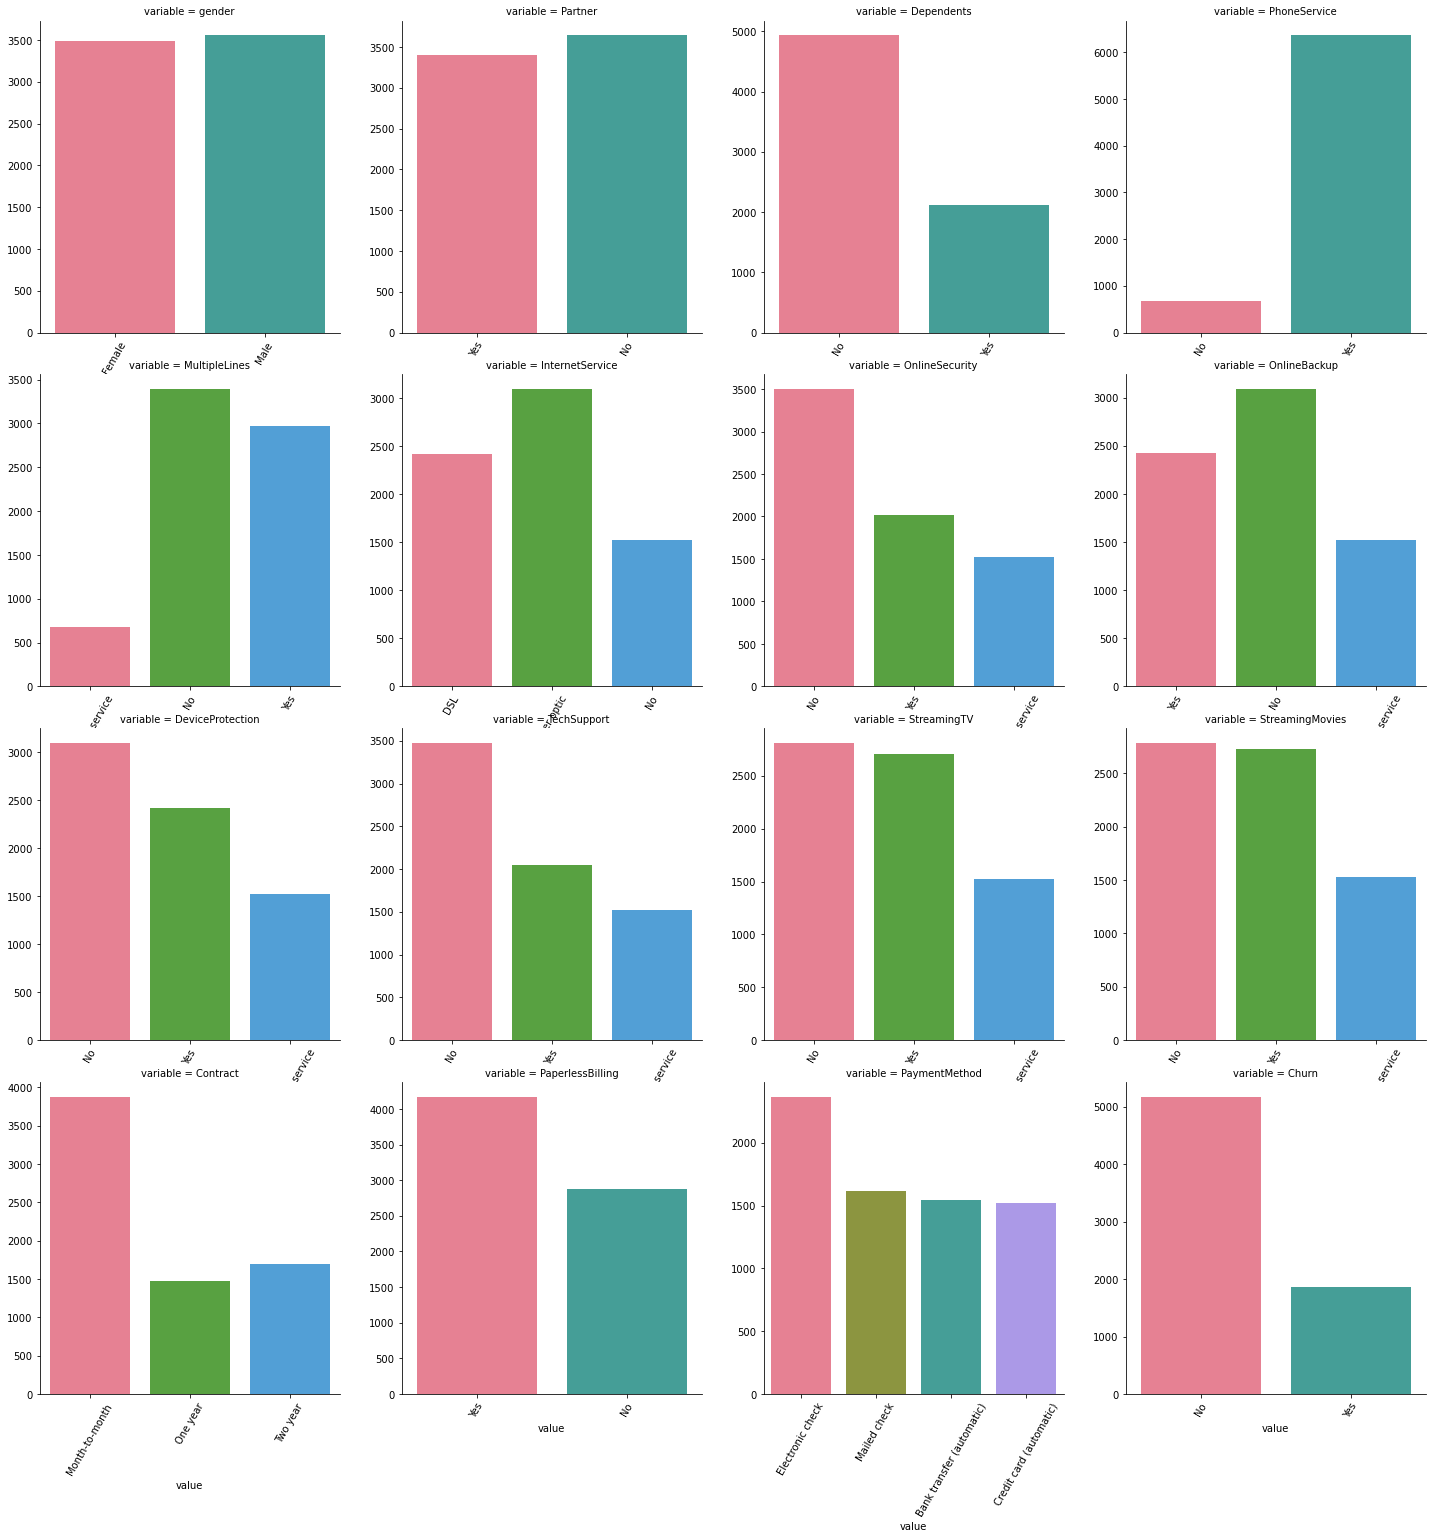

In [85]:
categorical_features = telco.dtypes[telco.dtypes == "object"].index
f = pd.melt(telco, value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value", palette="husl")
g.set_xticklabels(rotation=60)
plt.show()

# NUMERICAL VARIABLES

In [86]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


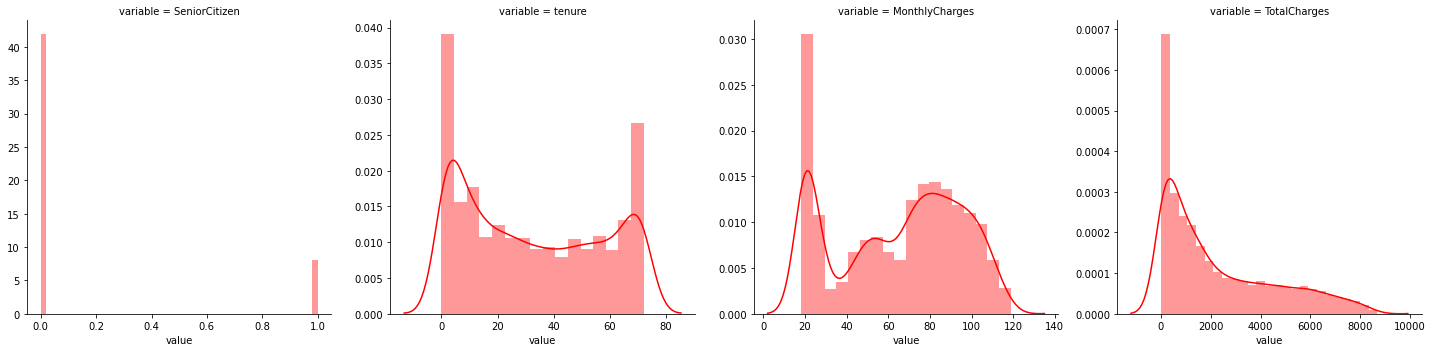

In [87]:
numerical_features = telco.dtypes[telco.dtypes != "object"].index
f = pd.melt(telco, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value", color="r")
plt.show()

# OUTLIER

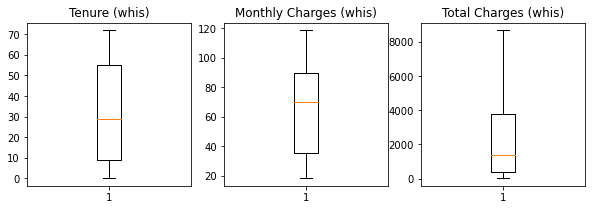

In [88]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.boxplot(telco["tenure"].dropna(), whis=10)
plt.title("Tenure (whis)")

plt.subplot(1,3,2)
plt.boxplot(telco["MonthlyCharges"].dropna(), whis=10)
plt.title("Monthly Charges (whis)")

plt.subplot(1,3,3)
plt.boxplot(telco["TotalCharges"].dropna(), whis=10)
plt.title("Total Charges (whis)")
plt.show() 

In [89]:
z_scores = zscore(telco.tenure.dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1675
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [90]:
z_scores = zscore(telco.MonthlyCharges.dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1324
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [91]:
z_scores = zscore(telco.TotalCharges.dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1362
------
Threshold value: 2
Number of Outliers: 394
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


We use Boxplot and Zscores for finding outliers.

In [92]:
winsorizing = winsorize(np.array(telco.TotalCharges.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[  84.6 , 1889.5 ,  108.15, ...,  346.45,  306.6 ,
                   5974.3 ],
             mask=False,
       fill_value=1e+20)

In [93]:
np.percentile(telco.TotalCharges.dropna(), [10,90])

array([  84.61, 5973.69])

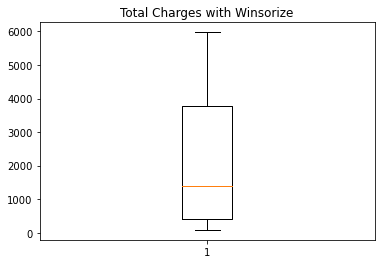

In [94]:
plt.boxplot(winsorizing)
plt.title("Total Charges with Winsorize")
plt.show()

# CORRALATION

In [95]:
a = telco.corr()
print(a)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


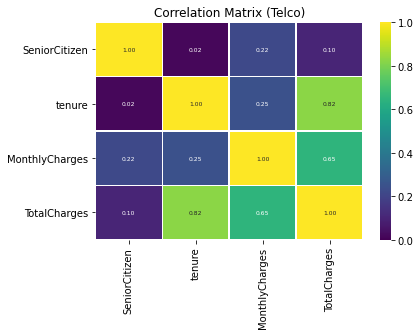

In [96]:
sns.heatmap(a, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Telco)")
plt.show()

Tenure is highly correlated with TotalCharges. The longer the customer is using the service, the bigger amount of accumulated charges.

## Analysis

**Tenure** 

We can see that a lot of customers stay at the telecom company for just a month, also many of them stay there for about 72 months. This could be because different customers have different contracts.

Text(0.5, 1.0, '# of Customers by their tenure')

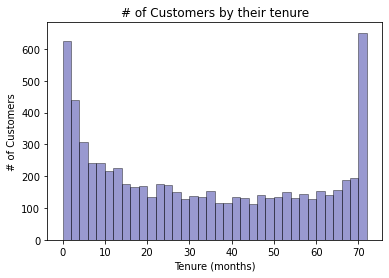

In [97]:
ax = sns.distplot(telco['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

**Churn** 

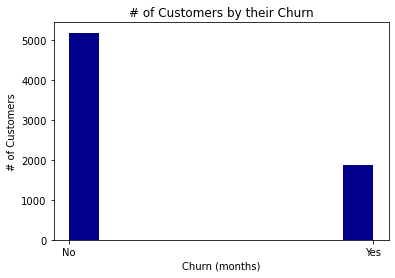

In [98]:
plt.hist(telco['Churn'],
             color = 'darkblue')
plt.ylabel('# of Customers')
plt.xlabel('Churn (months)')
plt.title('# of Customers by their Churn')
plt.show()

**Monthly Charges by Churn** 

Higher churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

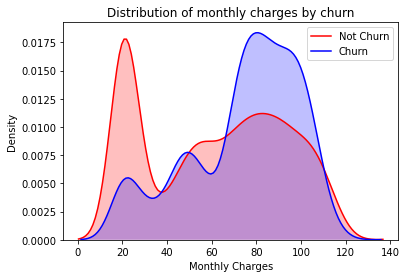

In [99]:
ax = sns.kdeplot(telco.MonthlyCharges[(telco["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco.MonthlyCharges[(telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**Total Charges by Churn**

Higher churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of total charges by churn')

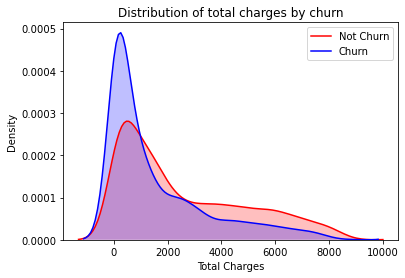

In [100]:
ax = sns.kdeplot(telco.TotalCharges[(telco["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco.TotalCharges[(telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

**Monthly and Total Charges by Churn**

- High Churn = Low Total Charges
- High Churn = High Monthly Charges <br>
We can see when customer charged by total they stay longer

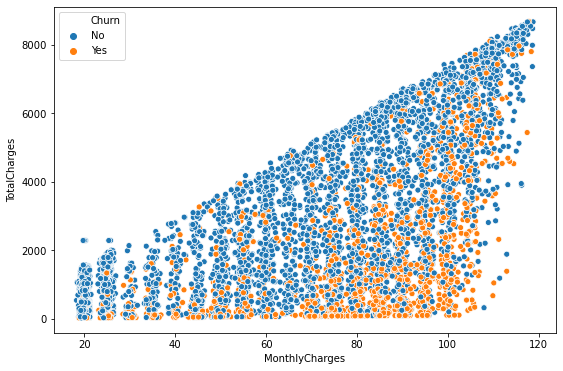

In [101]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = telco, hue = 'Churn')
plt.show()

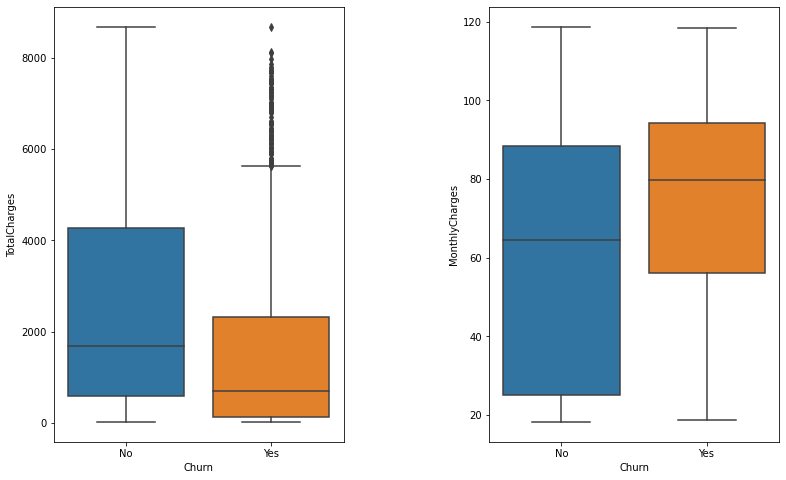

In [102]:
_, ax = plt.subplots(1, 2, figsize= (13, 8))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = telco, ax=ax[0])
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = telco, ax=ax[1])

### Tenure & Monthly Charges

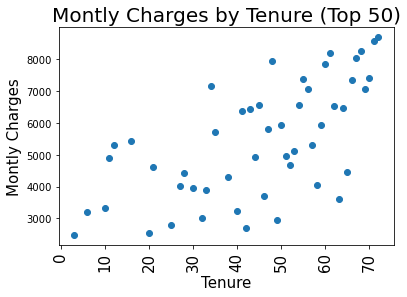

In [103]:
plt.scatter(telco.groupby('tenure')['MonthlyCharges'].max().sort_values(ascending=False).index[:50],
        telco.groupby('tenure')['TotalCharges'].max().sort_values(ascending=False).values[:50])
plt.title('Montly Charges by Tenure (Top 50)', fontsize=20)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Montly Charges', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=10)

plt.show()


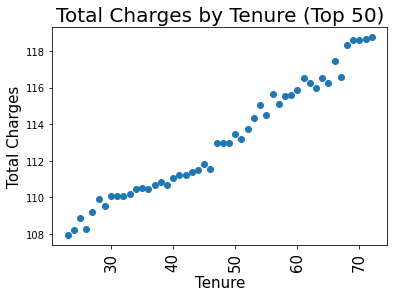

In [104]:
plt.scatter(telco.groupby('tenure')['TotalCharges'].max().sort_values(ascending=False).index[:50],
        telco.groupby('tenure')['MonthlyCharges'].max().sort_values(ascending=False).values[:50])
plt.title('Total Charges by Tenure (Top 50)', fontsize=20)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Total Charges', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=10)

plt.show()

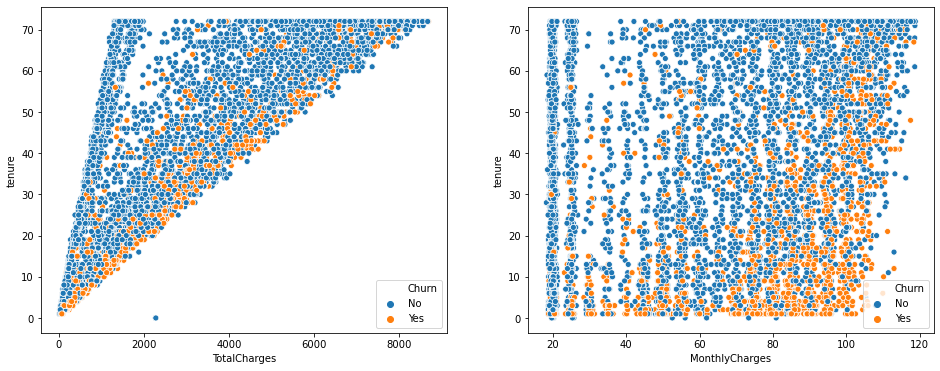

In [105]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=telco, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=telco, ax=ax[1])

## Numerical Features by Churn

We can see the churn customers use more services hence they are charged more.

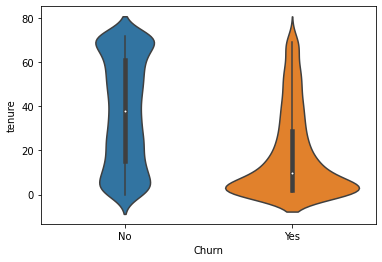

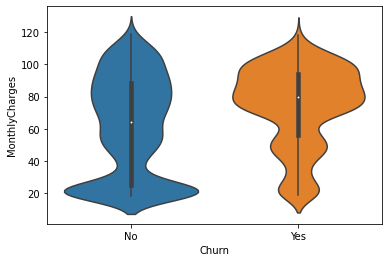

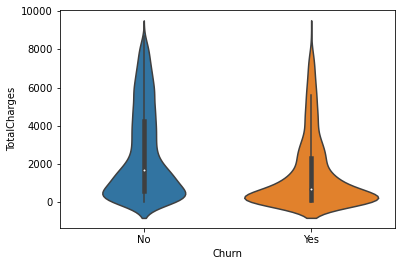

In [106]:
num_feature = ['tenure','MonthlyCharges', 'TotalCharges'] 
for col in num_feature:
    sns.violinplot(x='Churn',y=col,data=telco)
    plt.show()

## Categorical Features by Churn

- More than 80% of churn customers did not use OnlineSecurity on their InternetService. <br>
- More than 80% of churn customers did not use TechSupport. <br>
- More than 85% of churn customers used Month-to-month contract. <br>

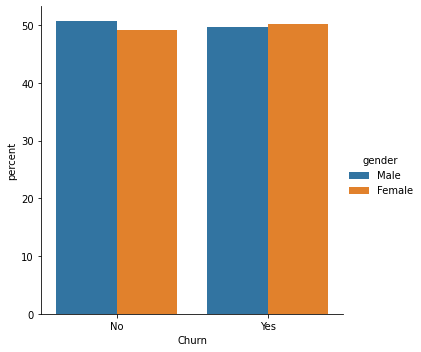

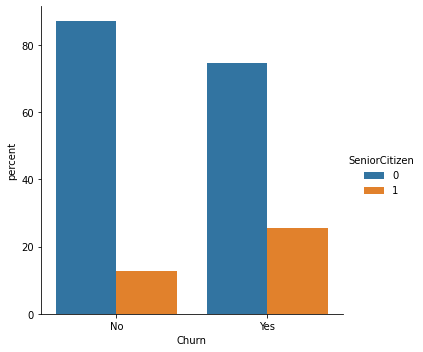

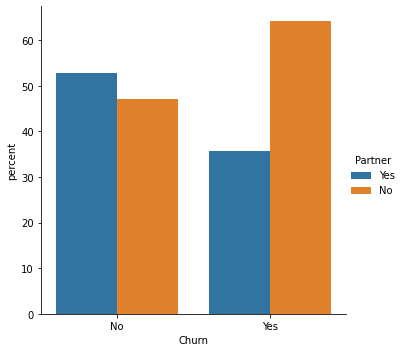

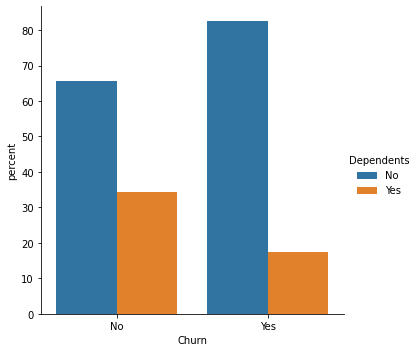

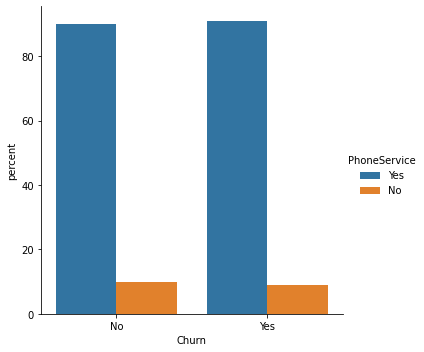

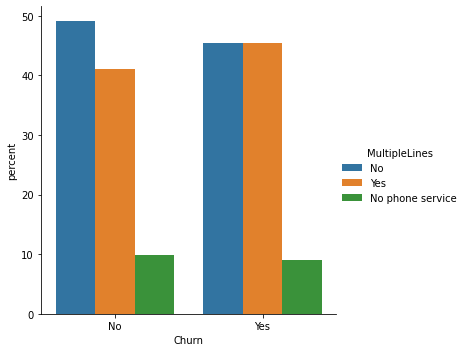

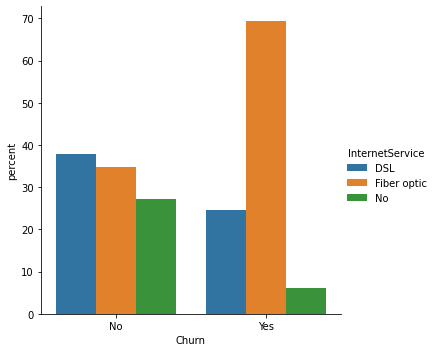

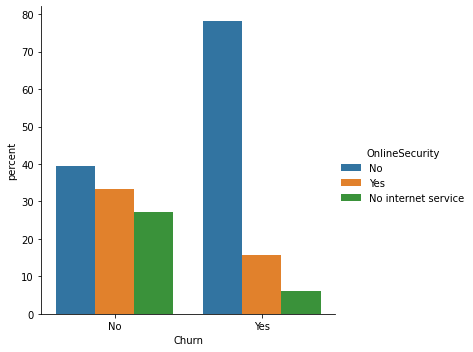

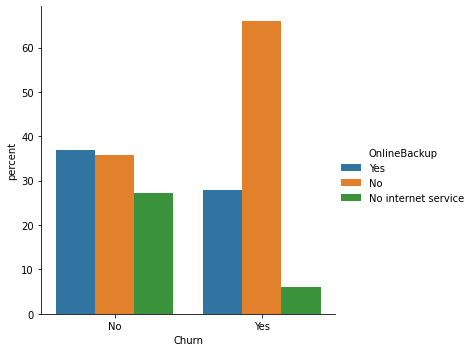

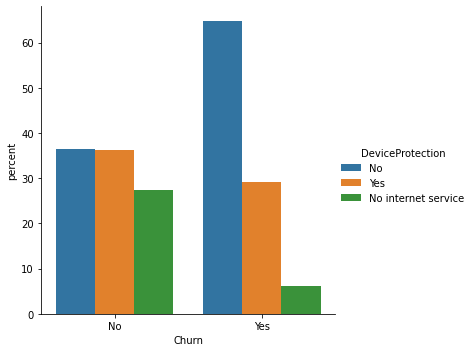

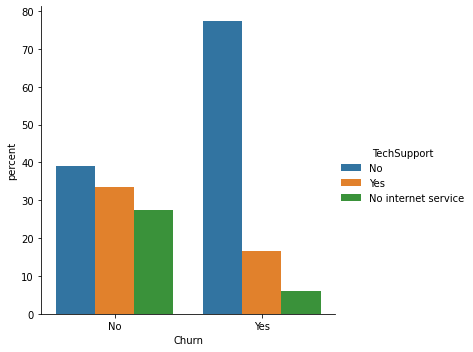

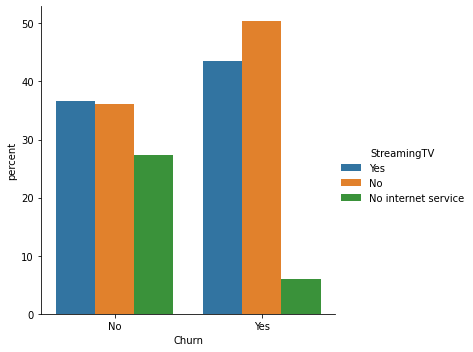

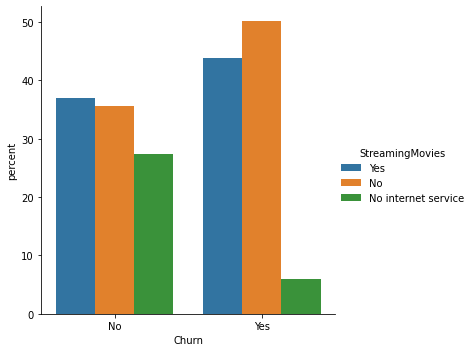

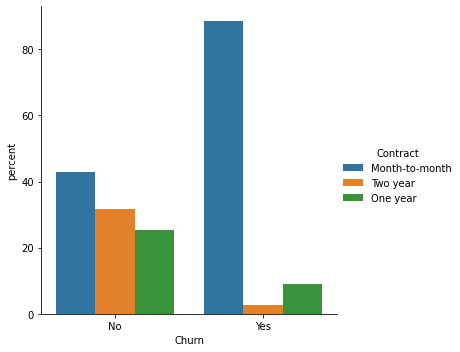

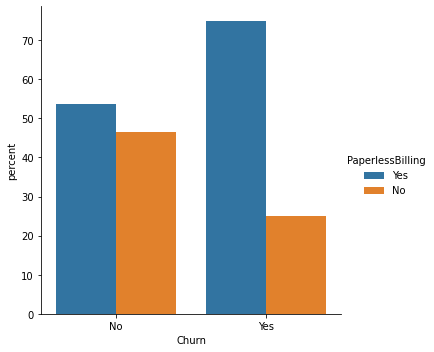

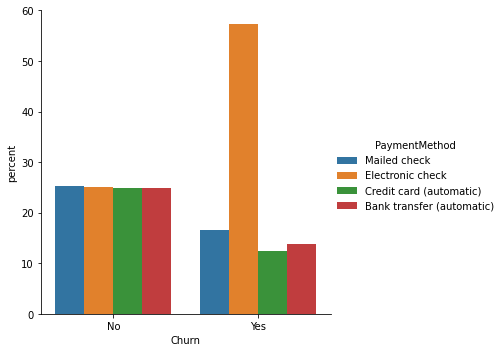

In [107]:
cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

for col in cat_feature:
    x,y = 'Churn', col

    (telco
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

    plt.show()


In [111]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
telco['Churn'] = np.where(telco.Churn == 'Yes',1,0)

In [113]:
#pd.get_dummies creates a new dataframe which consists of zeros and ones.
dummies = pd.get_dummies(telco)
#now take a look at our final dataset
dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


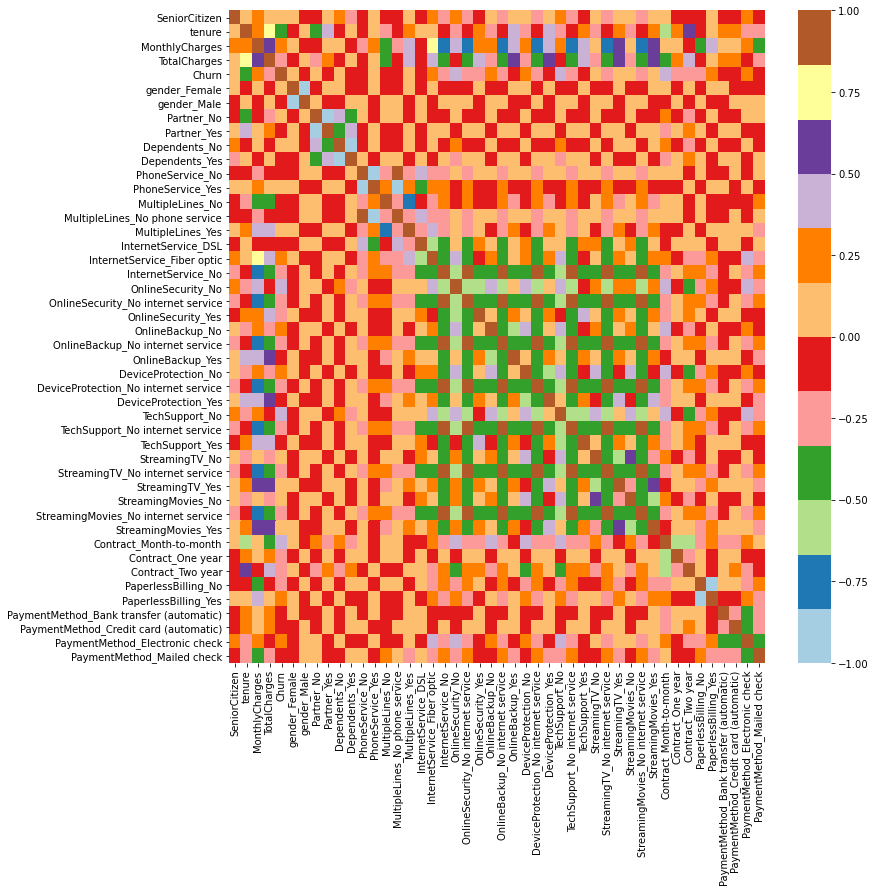

In [123]:
plt.figure(figsize=(12,12))
sns.heatmap(dummies.corr(), cmap="Paired")

# REPORT

Overall, we can conclude that: <br>
- The type of MonthlyCharges and PaperlessBilling has a strict relationship with churned clients. More number of monthly charges could lead a client to leave the service. May be the people having their bills deliverd in hard copy are loyal customers of the company.
- Churn ratio for senior citizens is significantly higher. Company must focus on some specific needs of senior citizens.
- Customers not having TechSupport from the telecom company have higher churn rate.
- Factors like Gender and Availability of PhoneService have almost no impact on Churn
- Customer with Partner and Dependents have lower chance of leaving
- Customer with Fiber Optic Interner Service have higher chances of leaving
- Customers without device protection have likely higher chances of leaving
- Customer not opting for TechSupport have higher chances of leaving
- People paying with electronic check have higher chances of leaving